INSTALL AND IMPORT THE REQUIRED LIBRARIES

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sys

READ THE DATA

In [4]:
r = pd.read_csv("../joshm/ratings.csv")
r.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
r.shape

In [5]:
movies = pd.read_csv("../joshm/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

DATA WRANGLING

In [6]:
movies['genres'] = movies['genres'].str.split('|')
movies['year']=movies['title'].str[-5:-1]
movies=movies[(movies['title'].str[-1]==')')&(movies['title'].str[-6]=='(')] #drop the movies without year in title
movies.year=pd.to_numeric(movies.year)
movies['Decade']=movies['year']//10 *10
movies=movies.set_index('movieId')
movies.sort_values('year').head() 

,title,genres,year,Decade
movieId,,,,
148054,Passage de Venus (1874),[Documentary],1874,1870
148048,Sallie Gardner at a Gallop (1878),[(no genres listed)],1878,1870
202045,Athlete Swinging a Pick (1880),[Documentary],1880,1880
166800,Buffalo Running (1883),[(no genres listed)],1883,1880
148040,Man Walking Around a Corner (1887),[(no genres listed)],1887,1880


Separating the Genres

In [7]:
sep = movies.reset_index().set_index(['movieId','title','year'])['genres'].apply(pd.Series).stack()
sep = sep.reset_index()
sep.columns=['movieId','title','year','level','genres']
sep.to_csv('sep.csv')
print('Available Genres: ',sep.genres.unique())
sep.head()

Available Genres:  ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


,movieId,title,year,level,genres
0,1,Toy Story (1995),1995,0,Adventure
1,1,Toy Story (1995),1995,1,Animation
2,1,Toy Story (1995),1995,2,Children
3,1,Toy Story (1995),1995,3,Comedy
4,1,Toy Story (1995),1995,4,Fantasy


## EDA

In [8]:
df = pd.merge(r,movies,on='movieId')
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


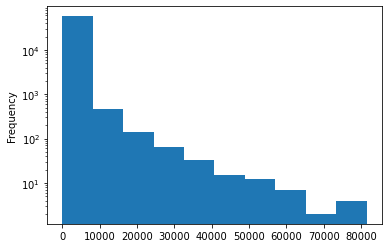

In [9]:
ratings['num of ratings'].plot(logy=True, kind='hist')
plt.show()

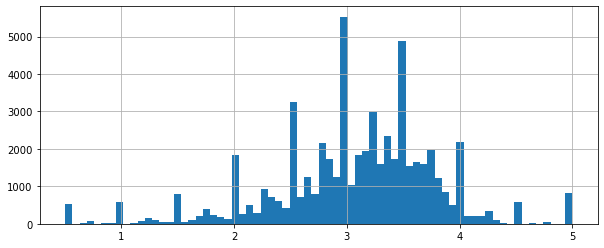

In [10]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.show()

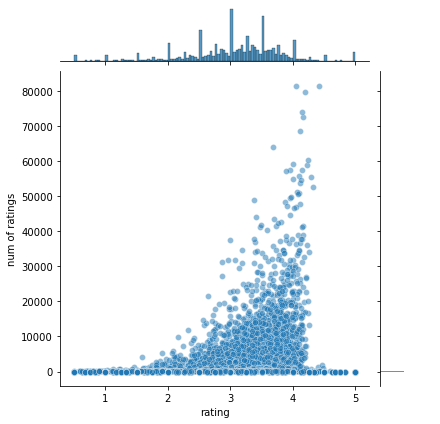

In [11]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
plt.show()

Total number of movies of each Genre

Drama, Comedy, and Thriller have the most production.

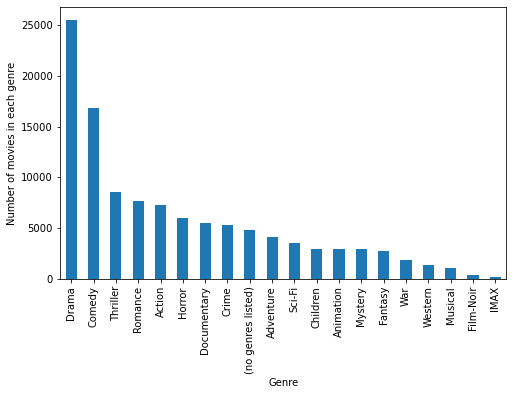

In [12]:
plt.figure(figsize=(8,5))
sep['genres'].value_counts().plot(kind='bar')
plt.ylabel('Number of movies in each genre')
plt.xlabel('Genre')
plt.savefig('foo.png',dpi=300,bbox_inches='tight')
plt.show()

Total number of movies in each decade

Most production was in 2010 decade.

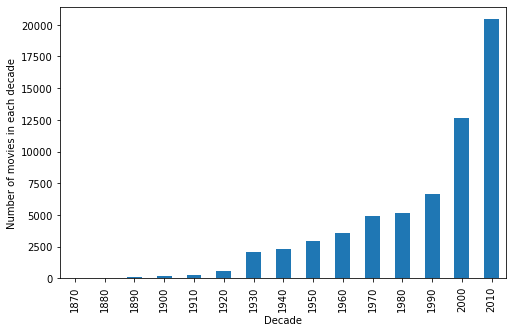

In [13]:
plt.figure(figsize=(8,5))
movies['Decade'].value_counts().sort_index().plot(kind='bar') 
plt.xlabel('Decade')
plt.ylabel('Number of movies in each decade')
plt.savefig('foo1.png',dpi=300,bbox_inches='tight')
plt.show()

3 years with most Drama genre are:

Most drama movies produced in 2014, 2015, and 2016 respectively.

In [14]:
sep[sep['genres']=='Drama']['year'].value_counts().head(3) 

2015    926
2014    909
2016    891
Name: year, dtype: int64

Number of drama movies in each decade.

Most drama movies produced in decade 2010 

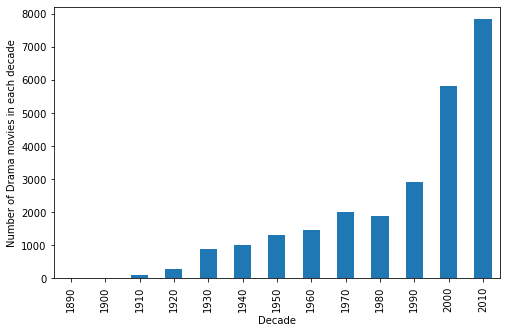

In [15]:
plt.figure(figsize=(8,5))
sep['Decade']=sep['year']//10 *10
sep[sep['genres']=='Drama']['Decade'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Number of Drama movies in each decade')
plt.savefig('foo2.png',dpi=300,bbox_inches='tight')
plt.show()


Movies with same title including the year are:

98 movies are with same title.

In [16]:
sum(movies['title'].value_counts()>1)

98

These movies which have repeated twice including the year are:

In [17]:
movies['title'].value_counts().head(16)

Another World (2014)     2
Shelter (2015)           2
Slow Burn (2000)         2
Black Field (2009)       2
Cold War (2018)          2
Office (2015)            2
The Connection (2014)    2
Berlin Calling (2008)    2
Interrogation (2016)     2
Stranded (2015)          2
Delirium (2018)          2
Inside (2012)            2
Chaos (2005)             2
Escape Room (2017)       2
Blackout (2007)          2
Sing (2016)              2
Name: title, dtype: int64

These movie titles (excluding the year in the title) have been repeated several times.

In [18]:
movies['Name']=movies['title'].str[:-7] #removing the year from title
movies['Name'].value_counts().head(20) 

Cinderella               16
First Love                9
Hamlet                    9
Home                      9
Aurora                    8
Treasure Island           8
Stranded                  8
Misérables, Les           8
The Escape                8
Revenge                   8
Wuthering Heights         8
Macbeth                   7
The Forest                7
Three Musketeers, The     7
Alice in Wonderland       7
Captive                   7
Trapped                   7
The Outsider              7
Heidi                     7
Countdown                 7
Name: Name, dtype: int64

8 movies have been produced with the title 'Hamlet', The following barplot shows the number of 'Hamlet' movies in each decade.

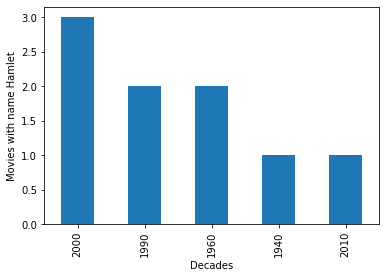

In [19]:
movies[movies.Name=='Hamlet'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Hamlet')
plt.savefig('foo2.png',dpi=300,bbox_inches='tight')
plt.show()

9 movies has been produced with title 'Misérables, Les'. The following barplot shows the number of 'Misérables, Les' movies in each decade.

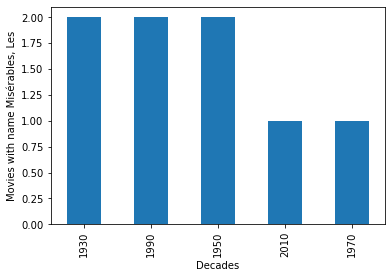

In [20]:
movies[movies.Name=='Misérables, Les'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Misérables, Les')
plt.savefig('foo3.png',dpi=300,bbox_inches='tight')
plt.show()

In [21]:
r.rating.value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [22]:
List=[]
for i in np.arange(4,5.5, 0.5):
    M=movies.loc[r[r.rating==i].movieId.value_counts().head(10).index,'title']
    print('Rate: %f' %i)
    print(M)
    print(' ')

Rate: 4.000000
593              Silence of the Lambs, The (1991)
356                           Forrest Gump (1994)
480                          Jurassic Park (1993)
457                          Fugitive, The (1993)
296                           Pulp Fiction (1994)
589             Terminator 2: Judgment Day (1991)
2571                           Matrix, The (1999)
1                                Toy Story (1995)
318              Shawshank Redemption, The (1994)
260     Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object
 
Rate: 4.500000
318                       Shawshank Redemption, The (1994)
2571                                    Matrix, The (1999)
2959                                     Fight Club (1999)
296                                    Pulp Fiction (1994)
4993     Lord of the Rings: The Fellowship of the Ring,...
356                                    Forrest Gump (1994)
593                       Silence of the Lambs, The (1991)
7153     Lord of the Rings: 

Average rating for the Shawshank Redemption is:

In [23]:
r[r.movieId==318].rating.mean()  #Average rating for the 'Shawshank Redemption, The'

4.413576004516335

Average rating for the Pulp Fiction is:

In [24]:
r[r.movieId==296].rating.mean() #Average rating for 'Pulp Fiction' 


4.188912039361382

The movies with the max number of ratings are:

Pulp Fiction, Forrest Gump, Shawshank redemption respectively.

In [25]:
MaxRating=r['movieId'].value_counts().head(10)

In [26]:
movies.loc[MaxRating.index,'title'] 

356                           Forrest Gump (1994)
318              Shawshank Redemption, The (1994)
296                           Pulp Fiction (1994)
593              Silence of the Lambs, The (1991)
2571                           Matrix, The (1999)
260     Star Wars: Episode IV - A New Hope (1977)
480                          Jurassic Park (1993)
527                       Schindler's List (1993)
110                             Braveheart (1995)
2959                            Fight Club (1999)
Name: title, dtype: object

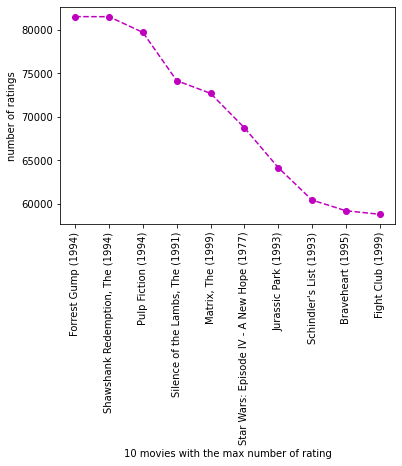

In [27]:
plt.plot(range(len(MaxRating)), MaxRating,'mo--')
plt.xticks(range(len(MaxRating)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('10 movies with the max number of rating')
plt.ylabel('number of ratings')
plt.savefig('foo4.png',dpi=300,bbox_inches='tight')
plt.show()

The movies with the highest average rating are:

Pulp Fiction, Forrest Gump, Shawshank redemption respectively

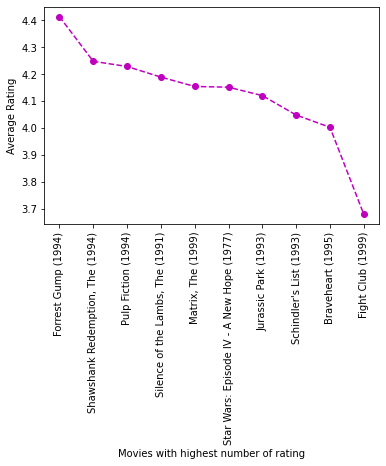

In [28]:
List5=[]
for i in MaxRating.index:
    List5.append(r[r.movieId==i].rating.mean())
plt.plot(range(len(List5)), sorted(List5,reverse=True),'mo--')
plt.xticks(range(len(List5)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('Movies with highest number of rating')
plt.ylabel('Average Rating')
plt.savefig('foo5.png',dpi=300,bbox_inches='tight')
plt.show()

Merge movie and rating data frames

In [29]:
r1= r.merge(sep.reset_index(), left_on='movieId', right_on='movieId', how='inner')
del r1['timestamp']
r1.head() #merge sep and rating

,userId,movieId,rating,index,title,year,level,genres,Decade
0,1,296,5.0,612,Pulp Fiction (1994),1994,0,Comedy,1990
1,1,296,5.0,613,Pulp Fiction (1994),1994,1,Crime,1990
2,1,296,5.0,614,Pulp Fiction (1994),1994,2,Drama,1990
3,1,296,5.0,615,Pulp Fiction (1994),1994,3,Thriller,1990
4,3,296,5.0,612,Pulp Fiction (1994),1994,0,Comedy,1990


Boxplot of 'Decade' vs 'Rating'

Movies of 40th decade has the highest rating

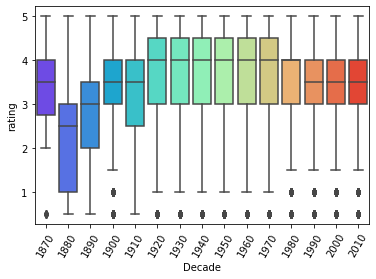

In [30]:
sns.boxplot(x='Decade', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=60)
plt.savefig('foo5.png',dpi=300,bbox_inches='tight')
plt.show()

In [31]:
df.head()

,userId,movieId,rating,timestamp,title,genres,year,Decade
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",1994,1990
1,3,296,5.0,1439474476,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",1994,1990
2,4,296,4.0,1573938898,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",1994,1990
3,5,296,4.0,830786155,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",1994,1990
4,7,296,4.0,835444730,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",1994,1990


Boxplot of the 'Decade' vs 'Genres'

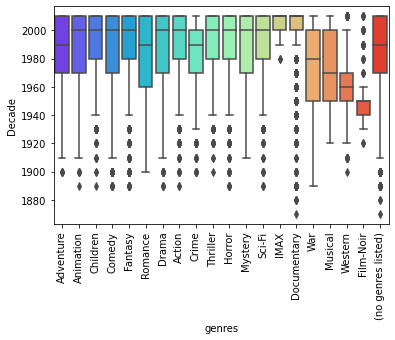

In [32]:
sns.boxplot(x='genres', y='Decade', data=sep,palette='rainbow')
plt.xticks(rotation=90)
plt.savefig('foo6.png',dpi=300,bbox_inches='tight')
plt.show()

Average rating of the ppl with highest number of rating

In [33]:
ID=r1.userId.value_counts().head(10) #UserID wih highest number of rating
List5=[]
for i in ID.index:
    List5.append(r1[r1.userId==i]['rating'].mean())

List5


[3.059529475759842,
 3.293543582104885,
 3.1621777103707966,
 2.588408644400786,
 3.2133722717491544,
 1.5864336965187351,
 2.7965700965700964,
 3.4570232095961386,
 2.4856424148606813,
 3.752986012887003]

Boxplot of the 'Genre' vs 'Rating'

<function matplotlib.pyplot.show(close=None, block=None)>

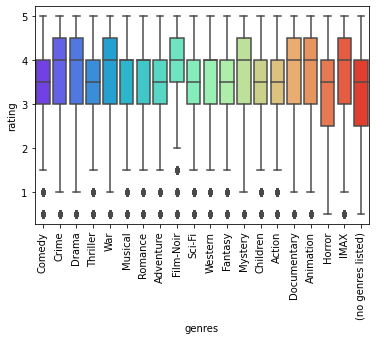

In [34]:
sns.boxplot(x='genres', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=90)
plt.savefig('foo7.png',dpi=300,bbox_inches='tight')
plt.show

CORRELATION MATRIX

The correlation matrix shows there is no correlation

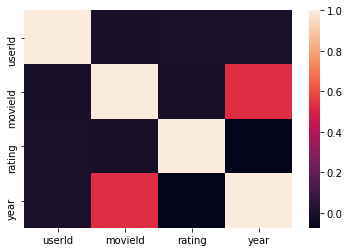

In [35]:
sns.heatmap(r1[['userId','movieId','rating','year']].corr())
plt.show()

WORD CLOUD

Word cloud for Titles : The most common word used in movie titles is "Love".

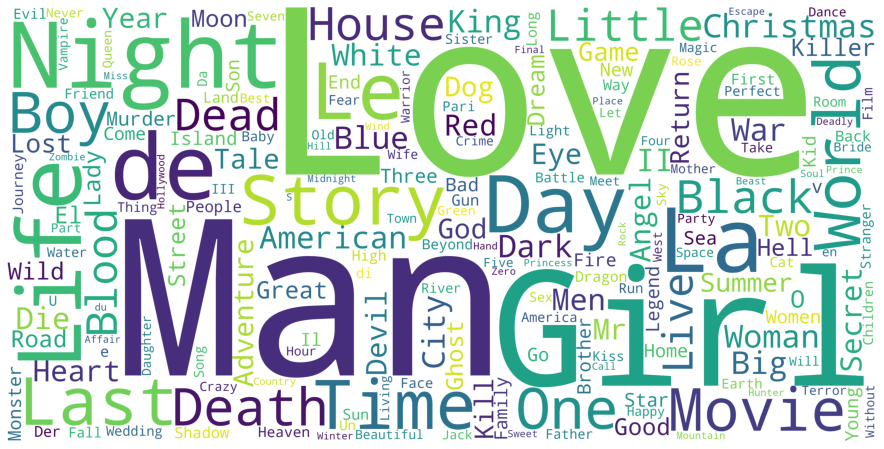

In [37]:
movies['title'] = movies['title'].astype('str')

title_corpus = ' '.join(movies['title'])


title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.savefig('world1.png',dpi=300,bbox_inches='tight')
plt.show()

MISSING VALUES

In [39]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
year         0
Decade       0
dtype: int64

It was observed that there are no missing values in the dataset.

In [43]:
plt.figure(figsize=(8,5))
sep['genres'].value_counts()
ax= sns.barplot(x= "genres", y= "count", data=df)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(),str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.ylabel('Number of movies in each genre')
plt.xlabel('genres')
#plt.savefig('foo.png',dpi=300,bbox_inches='tight')
plt.show()

ValueError: Could not interpret input 'count'

<Figure size 576x360 with 0 Axes>